In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cs_df = pd.read_csv('Data/CreditScore_train.csv')
cs_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [3]:
len(cs_df.index)

80000

In [4]:
cs_df.isna().sum()

x001        0
x002    17185
x003    17185
x004    17181
x005     4867
        ...  
x301        0
x302    58471
x303        0
x304    65456
y           0
Length: 305, dtype: int64

In [5]:
cs_df.fillna(method='bfill',inplace=True)
cs_df.fillna(method='ffill',inplace=True)

In [6]:
cs_df.isna().sum()[cs_df.isna().sum() > 0]

Series([], dtype: int64)

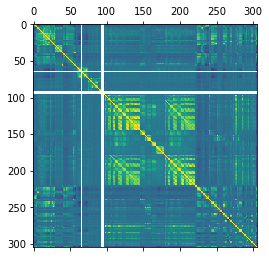

In [7]:
import matplotlib.pyplot as plt

plt.matshow(cs_df.corr())
plt.show()

In [8]:
Y = cs_df['y']
X = cs_df.drop(['y'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [12]:
model.predict(X_test)

array([758.12557252, 548.37133589, 620.8598118 , ..., 750.02858247,
       755.75137683, 752.92540596])

In [13]:
model.score(X_test,y_test)

0.8178270027389268

In [14]:
model.coef_

array([ 2.17978516e+00, -9.89122944e+00, -4.06152725e+00,  1.37419163e+01,
        1.57535671e+01, -4.43346538e-01,  1.08177620e-02,  9.17798954e+10,
        8.13082640e+10,  6.98772371e+10,  1.09089063e+11,  1.04607710e+11,
        1.05965386e+11,  2.23064747e+11,  2.34848731e+11, -2.77955360e+11,
       -5.57303422e+11, -1.78135456e+00,  5.39177690e+00,  2.92049122e+01,
       -1.33600060e+01,  1.80669705e+01, -8.41958114e+00,  2.24114462e+01,
        2.40476320e+00,  5.06866280e+00,  6.47084460e+00, -4.46210967e-01,
       -1.90482048e+00,  5.66549449e-01,  5.01313945e+00,  1.26326996e+00,
        4.01706167e-01, -2.41390991e+00,  2.05787659e-01, -1.38691216e+01,
       -4.29473877e-01,  1.94389343e+00,  7.39280701e-01, -3.93362427e+00,
       -2.70908546e+00, -3.78563595e+00,  3.34078789e+00, -1.02147865e+00,
        4.68089485e+00,  4.71232224e+00,  1.03899765e+00,  1.99272156e-01,
       -2.68806458e-01, -6.76795959e-01, -1.82725525e+00, -1.94228363e+00,
       -1.66790771e+00, -

In [15]:
model.intercept_

619.1620111623984

In [31]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}